# Plot results of sensitivity test assembling measurements of either SST or SSS or both as priors

In [2]:
# Load packages
import numpy as np # The 'numpy' package is needed for matrix operations and calculations
import pandas as pd # The 'pandas' package helps us to import and manage data
import matplotlib.pyplot as plt # The 'matplotlib' package contains tools needed to plot our data and results
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle # The 'Rectangle' function is used to add rectangles to our plots

### Load DA outcomes with normal model priors and measurements for SSS, SST or both

In [3]:
Model_priors_outcomes = pd.read_csv("Sensitivity_SSS_SST_measurements_as_priors/Model_priors_outcomes.csv")
SSS_measurement_as_prior_outcomes = pd.read_csv("Sensitivity_SSS_SST_measurements_as_priors/SSS_measurement_as_prior_outcomes.csv")
SST_measurement_as_prior_outcomes = pd.read_csv("Sensitivity_SSS_SST_measurements_as_priors/SST_measurement_as_prior_outcomes.csv")
SSS_and_SST_measurement_as_prior_outcomes = pd.read_csv("Sensitivity_SSS_SST_measurements_as_priors/SSS_and_SST_measurement_as_prior_outcomes.csv")

# COmbine outcomes
Combined_outcomes = pd.concat(
    [
        Model_priors_outcomes.assign(source="Model priors"),
        SSS_measurement_as_prior_outcomes.assign(source="SSS measurement as prior"),
        SST_measurement_as_prior_outcomes.assign(source="SST measurement as prior"),
        SSS_and_SST_measurement_as_prior_outcomes.assign(source="SSS and SST measurements as priors")
    ],
    ignore_index=True,
)

# Create SST dataframe for plotting
SST_outcomes = {
    'SST_mu_prior': Model_priors_outcomes["mu_prior_SST"],
    'SST_std_prior': Model_priors_outcomes["std_prior_SST"],
    'SST_mu_measurement': Model_priors_outcomes["mu_measurement_SST"],
    'SST_std_measurement': Model_priors_outcomes["std_measurement_SST"],
    'SST_mu_post_Model_priors': Model_priors_outcomes["mu_post_SST"],
    'SST_std_post_Model_priors': Model_priors_outcomes["std_post_SST"],
    'SST_mu_post_SSS_measurement_as_prior': SSS_measurement_as_prior_outcomes["mu_post_SST"],
    'SST_std_post_SSS_measurement_as_prior': SSS_measurement_as_prior_outcomes["std_post_SST"],
    'SST_mu_post_SST_measurement_as_prior': SST_measurement_as_prior_outcomes["mu_post_SST"],
    'SST_std_post_SST_measurement_as_prior': SST_measurement_as_prior_outcomes["std_post_SST"],
    'SST_mu_post_SSS_and_SST_measurement_as_prior': SSS_and_SST_measurement_as_prior_outcomes["mu_post_SST"],
    'SST_std_post_SSS_and_SST_measurement_as_prior': SSS_and_SST_measurement_as_prior_outcomes["std_post_SST"]
}

# Create SAT dataframe for plotting
SAT_outcomes = {
    'SAT_mu_prior': Model_priors_outcomes["mu_prior_SAT"],
    'SAT_std_prior': Model_priors_outcomes["std_prior_SAT"],
    'SAT_mu_measurement': Model_priors_outcomes["mu_measurement_SAT"],
    'SAT_std_measurement': Model_priors_outcomes["std_measurement_SAT"],
    'SAT_mu_post_Model_priors': Model_priors_outcomes["mu_post_SAT"],
    'SAT_std_post_Model_priors': Model_priors_outcomes["std_post_SAT"],
    'SAT_mu_post_SSS_measurement_as_prior': SSS_measurement_as_prior_outcomes["mu_post_SAT"],
    'SAT_std_post_SSS_measurement_as_prior': SSS_measurement_as_prior_outcomes["std_post_SAT"],
    'SAT_mu_post_SST_measurement_as_prior': SST_measurement_as_prior_outcomes["mu_post_SAT"],
    'SAT_std_post_SST_measurement_as_prior': SST_measurement_as_prior_outcomes["std_post_SAT"],
    'SAT_mu_post_SSS_and_SST_measurement_as_prior': SSS_and_SST_measurement_as_prior_outcomes["mu_post_SAT"],
    'SAT_std_post_SSS_and_SST_measurement_as_prior': SSS_and_SST_measurement_as_prior_outcomes["std_post_SAT"]
}

# Create the Pandas DataFrames
SST_outcomes_df = pd.DataFrame(SST_outcomes)
SAT_outcomes_df = pd.DataFrame(SAT_outcomes)

### Combined plot of measurements, priors and posteriors with precision uncertainties

C:\Users\nwi213\AppData\Local\Temp\ipykernel_27160\3653022991.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("coolwarm")


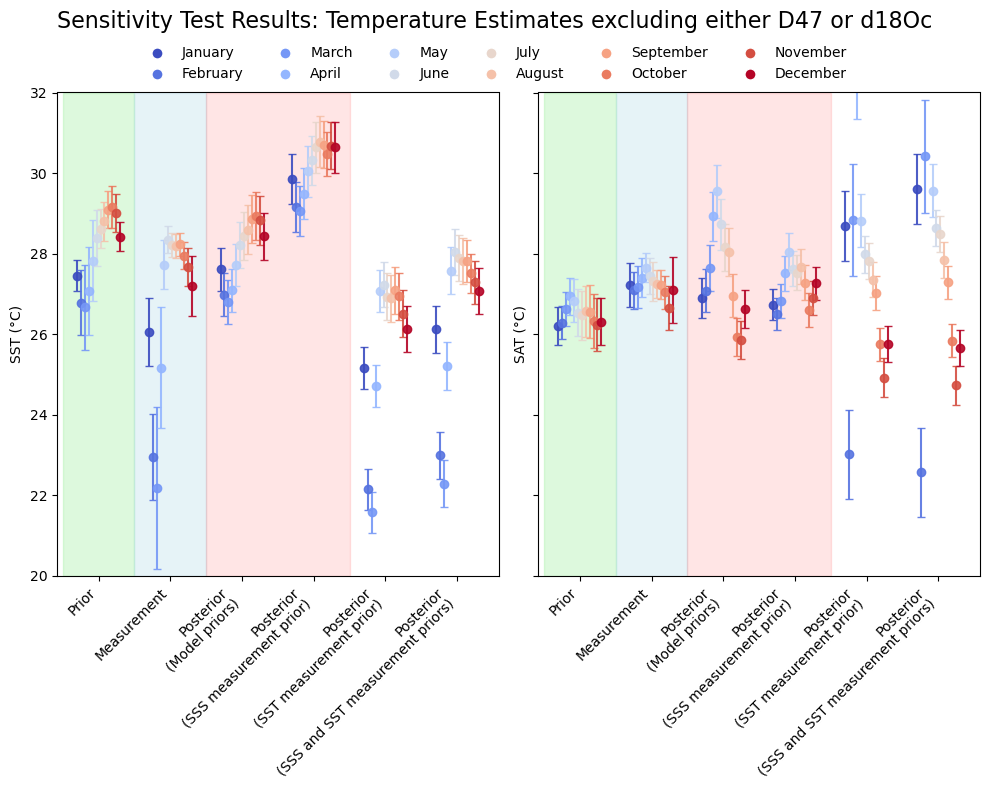

In [7]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10, 8), sharey=True)
fig.subplots_adjust(hspace=0.3)

# Columns to plot (mu + corresponding std) and nicer xlabels
mu_cols_sst = ["SST_mu_prior", "SST_mu_measurement", "SST_mu_post_Model_priors", "SST_mu_post_SSS_measurement_as_prior", "SST_mu_post_SST_measurement_as_prior", "SST_mu_post_SSS_and_SST_measurement_as_prior"]
std_cols_sst = ["SST_std_prior", "SST_std_measurement", "SST_std_post_Model_priors", "SST_std_post_SSS_measurement_as_prior", "SST_std_post_SST_measurement_as_prior", "SST_std_post_SSS_and_SST_measurement_as_prior"]
mu_cols_sat = ["SAT_mu_prior", "SAT_mu_measurement", "SAT_mu_post_Model_priors", "SAT_mu_post_SSS_measurement_as_prior", "SAT_mu_post_SST_measurement_as_prior", "SAT_mu_post_SSS_and_SST_measurement_as_prior"]
std_cols_sat = ["SAT_std_prior", "SAT_std_measurement", "SAT_std_post_Model_priors", "SAT_std_post_SSS_measurement_as_prior", "SAT_std_post_SST_measurement_as_prior", "SAT_std_post_SSS_and_SST_measurement_as_prior"]

# Horizontal axis layout prep
x = np.arange(len(mu_cols_sst))
x_offsets = np.linspace(-0.3, 0.3, len(SST_outcomes_df.index))
xlabels = ["Prior", "Measurement", "Posterior\n(Model priors)", "Posterior\n(SSS measurement prior)", "Posterior\n(SST measurement prior)", "Posterior\n(SSS and SST measurement priors)"]

# colour map for test cases (rows)
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
n_cases = len(SST_outcomes_df)
cmap = plt.cm.get_cmap("coolwarm")
# Check if length of cases equals the number of months (it should)
if n_cases == len(months):
    colors = [cmap(i / (len(months) - 1)) for i in range(len(months))]
    legend_labels = months.copy()
else:
    colors = [cmap(i / max(n_cases - 1, 1)) for i in range(n_cases)]
    legend_labels = [str(idx) for idx in SST_outcomes_df.index]

# Plot SST outcomes
for i, idx in enumerate(SST_outcomes_df.index):
    means = SST_outcomes_df.loc[idx, mu_cols_sst].values.astype(float)
    errs = SST_outcomes_df.loc[idx, std_cols_sst].values.astype(float)
    ax1.errorbar(x + x_offsets[i], means, yerr=errs, capsize=3, fmt='o', color=colors[i], alpha=0.9)
ax1.set_ylim(20, 32) # Equalize vertical axes between plot panels
# Add light green rectangle to highlight prior
ax1.add_patch(
    Rectangle(
        (-0.5, ax1.get_ylim()[0]),  # (x,y)
        1,                          # width
        ax1.get_ylim()[1] - ax1.get_ylim()[0],  # height
        color='lightgreen',
        alpha=0.3,
    )
)
# Add light blue rectangle to highlight measurement
ax1.add_patch(
    Rectangle(
        (0.5, ax1.get_ylim()[0]),  # (x,y)
        1,                          # width
        ax1.get_ylim()[1] - ax1.get_ylim()[0],  # height
        color='lightblue',
        alpha=0.3,
    )
)
# Add light red rectangle to highlight posteriors
ax1.add_patch(
    Rectangle(
        (1.5, ax1.get_ylim()[0]),  # (x,y)
        2,         # width
        ax1.get_ylim()[1] - ax1.get_ylim()[0],  # height
        color='red',
        alpha=0.1,
    )
)
ax1.set_xticks(x)
ax1.set_xticklabels(xlabels, rotation=45, ha="right")
ax1.set_ylabel("SST (°C)")

# Plot SAT outcomes
for i, idx in enumerate(SAT_outcomes_df.index):
    means = SAT_outcomes_df.loc[idx, mu_cols_sat].values.astype(float)
    errs = SAT_outcomes_df.loc[idx, std_cols_sat].values.astype(float)
    ax3.errorbar(x + x_offsets[i], means, yerr=errs, capsize=3, fmt='o', color=colors[i], alpha=0.9)
ax3.set_ylim(20, 32) # Equalize vertical axes between plot panels
# Add light green rectangle to highlight prior
ax3.add_patch(
    Rectangle(
        (-0.5, ax3.get_ylim()[0]),  # (x,y)
        1,                          # width
        ax3.get_ylim()[1] - ax3.get_ylim()[0],  # height
        color='lightgreen',
        alpha=0.3,
    )
)
# Add light blue rectangle to highlight measurement
ax3.add_patch(
    Rectangle(
        (0.5, ax3.get_ylim()[0]),  # (x,y)
        1,                          # width
        ax3.get_ylim()[1] - ax3.get_ylim()[0],  # height
        color='lightblue',
        alpha=0.3,
    )
)
# Add light red rectangle to highlight posteriors
ax3.add_patch(
    Rectangle(
        (1.5, ax3.get_ylim()[0]),  # (x,y)
        2,         # width
        ax3.get_ylim()[1] - ax3.get_ylim()[0],  # height
        color='red',
        alpha=0.1,
    )
)
ax3.set_xticks(x)
ax3.set_xticklabels(xlabels, rotation=45, ha="right")
ax3.set_ylabel("SAT (°C)")

# build shared legend (ordered according to legend_labels)
proxy_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=8, linestyle='') 
                 for i in range(len(legend_labels))]
fig.legend(proxy_handles, legend_labels, loc="upper center", bbox_to_anchor=(0.5, 0.95), ncol=6, frameon=False)

plt.suptitle('Sensitivity Test Results: Temperature Estimates excluding either D47 or d18Oc', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()